In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 5  # Domain size [-L, L]
N = 1000  # Number of grid points
hbar = 1  # Reduced Planck's constant
m = 1  # Mass of the particle
k = 1  # Spring constant

# Discretize the domain
x = np.linspace(-L, L, N)  # Grid points
dx = x[1] - x[0]  # Grid spacing

# Harmonic potential
V = 0.5 * k * x**2

# Construct the Hamiltonian matrix
H = np.zeros((N, N))
for i in range(N):
    if i > 0:
        H[i, i - 1] = -hbar**2 / (2 * m * dx**2)
    H[i, i] = hbar**2 / (m * dx**2) + V[i]
    if i < N - 1:
        H[i, i + 1] = -hbar**2 / (2 * m * dx**2)

In [5]:
# Solve the eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Extract the first three eigenvalues and eigenvectors
E1, E2, E3 = eigenvalues[:3]
psi1, psi2, psi3 = eigenvectors[:, 0], eigenvectors[:, 1], eigenvectors[:, 2]

# Normalize the wavefunctions
psi1 /= np.sqrt(np.sum(psi1**2) * dx)
psi2 /= np.sqrt(np.sum(psi2**2) * dx)
psi3 /= np.sqrt(np.sum(psi3**2) * dx)

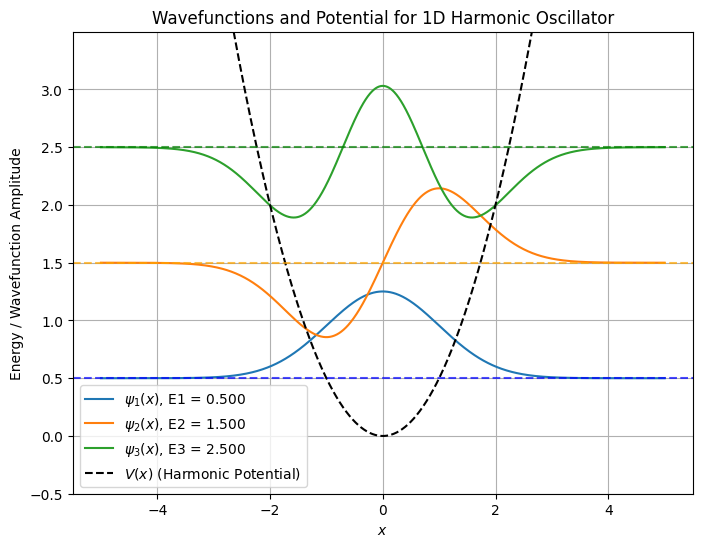

In [6]:
# Plot the wavefunctions and potential
plt.figure(figsize=(8, 6))
plt.plot(x, psi1 + E1, label=f"$\psi_1(x)$, E1 = {E1:.3f}")
plt.plot(x, psi2 + E2, label=f"$\psi_2(x)$, E2 = {E2:.3f}")
plt.plot(x, psi3 + E3, label=f"$\psi_3(x)$, E3 = {E3:.3f}")
plt.plot(x, V, 'k--', label="$V(x)$ (Harmonic Potential)")

# Add horizontal lines for energy levels
plt.axhline(E1, color='blue', linestyle='--', alpha=0.7)
plt.axhline(E2, color='orange', linestyle='--', alpha=0.7)
plt.axhline(E3, color='green', linestyle='--', alpha=0.7)

# Formatting
plt.title("Wavefunctions and Potential for 1D Harmonic Oscillator")
plt.xlabel("$x$")
plt.ylabel("Energy / Wavefunction Amplitude")
plt.legend()
plt.grid()
plt.ylim(-0.5, E3 + 1)  # Adjust y-axis for better spacing
plt.show()